In [1]:
using TopologyOptimizationHelper, DelimitedFiles

[ Info: Precompiling TopologyOptimizationHelper [b5275363-5667-4a27-81d8-f48bed5c410a] (cache misses: include_dependency fsize change (18), incompatible header (2))


In [2]:
Lx = Ly = 4
ω = 2π
res = 40
ρ = readdlm("pengning_scraped_verlan.txt")
offset = -round(Int, res * (0.2 + 1.5))
N, M = size(ρ)
b = zeros(N, M)
b[N÷2 + offset, M÷2] = 1

1

In [3]:
A, x, y = Maxwell2d(Lx, Ly, ones(N,M), ω; resolution=res)
v = A \ vec(b)
LDOS_norm = -imag(v' * vec(b))

0.00015521510680940442

In [4]:
_, ε_init, _, _, _, _ = LDOS_Optimize2d(
    Lx, Ly, ρ, ω, b;
    resolution=res,
    ftol=0,
    max_eval=100,
    design_dimensions=(3, 3),
    mat_loss=1e-4,
    max_mat=5
)

(iter, LDOS) = (1, 0.0001854437380385967)
(iter, LDOS) = (2, 0.00018544641402783805)
(iter, LDOS) = (3, 0.00018547318770543235)
(iter, LDOS) = (4, 0.0001858585526215229)
(iter, LDOS) = (5, 0.00019181406024219576)
(iter, LDOS) = (6, 0.00032319823939014786)
(iter, LDOS) = (7, 0.0001376462470581114)
(iter, LDOS) = (8, 0.00015076500963056373)
(iter, LDOS) = (9, 0.00016095696633076911)
(iter, LDOS) = (10, 0.00029432649635086755)
(iter, LDOS) = (11, 0.00034346827055609417)
(iter, LDOS) = (12, 0.00022466640666432263)
(iter, LDOS) = (13, 0.0003541709887290049)
(iter, LDOS) = (14, 0.0003085180937225284)
(iter, LDOS) = (15, 0.0003696065173082935)
(iter, LDOS) = (16, 0.00016610929888441256)
(iter, LDOS) = (17, 0.000364565376499709)
(iter, LDOS) = (18, 0.00037982515946465164)
(iter, LDOS) = (19, 0.00043608314849501775)
(iter, LDOS) = (20, 0.00011947402099809634)
(iter, LDOS) = (21, 0.00014716376860496804)
(iter, LDOS) = (22, 0.00016121845307939198)
(iter, LDOS) = (23, 0.00027656336300877735)
(iter

(0.0017667422689192607, ComplexF64[1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; … ; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im], [0.0001854437380385967, 0.00018544641402783805, 0.00018547318770543235, 0.0001858585526215229, 0.00019181406024219576, 0.00032319823939014786, 0.0001376462470581114, 0.00015076500963056373, 0.00016095696633076911, 0.00029432649635086755  …  0.001311320341539885, 0.001707333852787675, 0.0016039400456433984, 0.0017333838357745928, 0.0016364120666866034, 0.0017494290758848978, 0.0017667422689192607, 0.00020626493647243874, 0.0002694272437328932, 0.0009070840073735546], ComplexF64[6.318245553688032 - 0.011268805486088074im, 6.3182441094819835 - 0.011268944972579773im, 6.318229667962555 - 0.011270340189839655im, 6.31802310042792 - 0.011290345061986375im, 6.3151401908278135 - 0.011579247078214117im, 6.291316973917742 - 0.015091395341422464im, 6.3277253

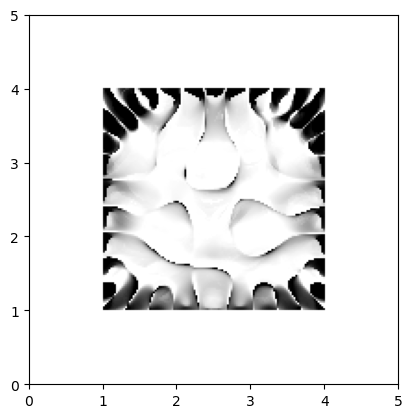

PyObject <matplotlib.image.AxesImage object at 0x00000185268D3F40>

In [34]:
ρ_init = real.(ε_init .- 1) / 5
imshow(ρ_init, cmap="gray_r", vmin=0, vmax=1, extent=(0, 5, 0, 5))

In [6]:
mod_LDOS_opt, mod_ε_opt, mod_LDOS_vals, mod_omegas, x, y = mod_LDOS_Optimize2d(
    Lx, Ly, ρ_init, ω, b, vec(b);
    resolution=res,
    ftol=0,
    max_eval=1000,
    design_dimensions=(3, 3),
    mat_loss=1e-4,
    max_mat=5
)

(iter, LDOS) = (1, 0.00186213960888195)
(iter, LDOS) = (2, 0.0018622402339701282)
(iter, LDOS) = (3, 0.001863240711693722)
(iter, LDOS) = (4, 0.0018769014911141815)
(iter, LDOS) = (5, 0.0020355204095010974)
(iter, LDOS) = (6, 0.0017730663483880528)
(iter, LDOS) = (7, 0.0023722375493129824)
(iter, LDOS) = (8, 0.0001556894590216614)
(iter, LDOS) = (9, 0.00017244733944888163)
(iter, LDOS) = (10, 0.00016589997014870283)
(iter, LDOS) = (11, 0.002328983543736118)
(iter, LDOS) = (12, 0.002568819394782053)
(iter, LDOS) = (13, 0.002847251184775959)
(iter, LDOS) = (14, 0.0001779205440501973)
(iter, LDOS) = (15, 0.0002139611059822802)
(iter, LDOS) = (16, 0.001732347624829403)
(iter, LDOS) = (17, 0.0031473291480056957)
(iter, LDOS) = (18, 0.003331772363593046)
(iter, LDOS) = (19, 0.00015361645000608315)
(iter, LDOS) = (20, 0.00028305916350677827)
(iter, LDOS) = (21, 0.0029131230264797065)
(iter, LDOS) = (22, 0.0041509784294783865)
(iter, LDOS) = (23, 0.004562523755991545)
(iter, LDOS) = (24, 0.004

(0.05514220580893103, ComplexF64[1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; … ; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 1.0 + 0.0im], [0.00186213960888195, 0.0018622402339701282, 0.001863240711693722, 0.0018769014911141815, 0.0020355204095010974, 0.0017730663483880528, 0.0023722375493129824, 0.0001556894590216614, 0.00017244733944888163, 0.00016589997014870283  …  0.05510526345996732, 0.055107219594222136, 0.05511837582990622, 0.049492178182915916, 0.055093705705853514, 0.055122668499953134, 0.05512493607779492, 0.05512682306216641, 0.05514220580893103, 0.05107335865240266], ComplexF64[6.283780417969237 - 0.0019931531065681286im, 6.283785038801579 - 0.001993022268526106im, 6.283831279011582 - 0.0019917202338201063im, 6.28450949143044 - 0.0019739279946432288im, 6.294168999473276 - 0.0017872350368183401im, 6.364600770219321 - 0.002584176506996315im, 6.311470334779584 - 0.0016036251

In [7]:
mod_ρ_opt = real.(mod_ε_opt .- 1) / 5

mod_LDOS_vals ./= LDOS_norm
mod_LDOS_vals = vcat(fill.(mod_LDOS_vals, 2)...)

mod_Qs = -real.(mod_omegas) ./ (2 * imag.(mod_omegas))
mod_Qs = vcat(fill.(mod_Qs, 2)...)

2000-element Vector{Float64}:
  1576.3416260552208
  1576.3416260552208
  1576.4462690747073
  1576.4462690747073
  1577.4884374597218
  1577.4884374597218
  1591.8791132414922
  1591.8791132414922
  1760.8677285888039
  1760.8677285888039
  1231.4562788160965
  1231.4562788160965
  1967.875865288443
     ⋮
 46624.48471320568
 46624.48471320568
 46622.39449413053
 46622.39449413053
 46625.90337395838
 46625.90337395838
 46628.41426927965
 46628.41426927965
 46648.711832637964
 46648.711832637964
 43083.79482161048
 43083.79482161048

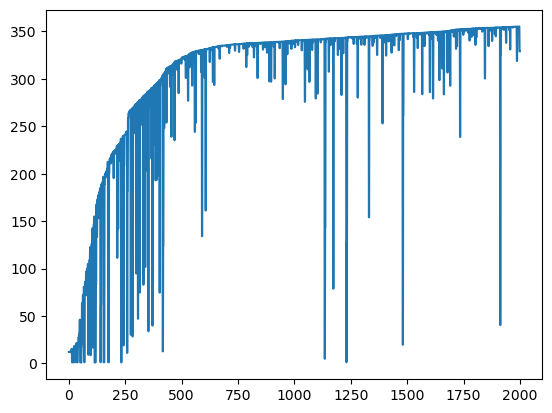

355.2631373481102

In [50]:
using PyPlot
plot(mod_LDOS_vals)
maximum(mod_LDOS_vals)

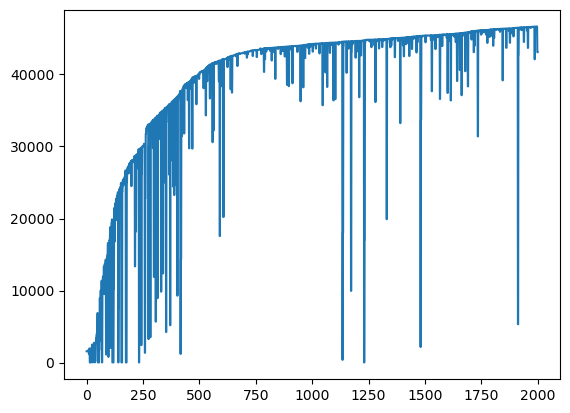

46648.711832637964

In [49]:
plot(mod_Qs)
maximum(mod_Qs)

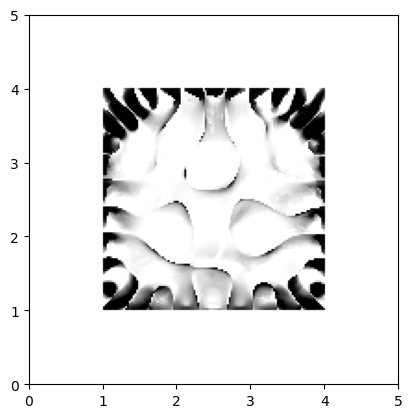

PyObject <matplotlib.image.AxesImage object at 0x0000018529D58D30>

In [35]:
imshow(mod_ρ_opt, cmap="gray_r", vmin=0, vmax=1, extent=(0, 5, 0, 5))

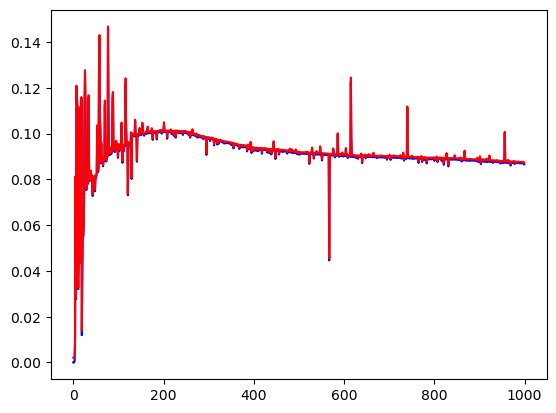

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001852E5C1A50>

In [61]:
plot(abs.(mod_omegas .- 6.283780417969237 .+ 0.001993153106568134im), color="blue")
plot(abs.(mod_omegas .- ω), color="red")